In [ ]:
from pandas.core.reshape.concat import concat

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [ ]:
iris = load_iris()

In [ ]:
features_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
label_df = pd.DataFrame(iris.target,columns=["species"])

In [ ]:
iris_df = concat([features_df,label_df],axis=1)

In [ ]:
print(iris_df)

     sepal length (cm)  sepal width (cm)  ...  petal width (cm)  species
0                  5.1               3.5  ...               0.2        0
1                  4.9               3.0  ...               0.2        0
2                  4.7               3.2  ...               0.2        0
3                  4.6               3.1  ...               0.2        0
4                  5.0               3.6  ...               0.2        0
..                 ...               ...  ...               ...      ...
145                6.7               3.0  ...               2.3        2
146                6.3               2.5  ...               1.9        2
147                6.5               3.0  ...               2.0        2
148                6.2               3.4  ...               2.3        2
149                5.9               3.0  ...               1.8        2

[150 rows x 5 columns]


In [ ]:
print(iris_df.isna().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [ ]:
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [ ]:
print(iris_df.describe().T)

                   count      mean       std  min  25%   50%  75%  max
sepal length (cm)  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal width (cm)   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal length (cm)  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal width (cm)   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5
species            150.0  1.000000  0.819232  0.0  0.0  1.00  2.0  2.0


In [ ]:
print(iris_df.columns[1],iris_df.columns[2],iris_df.columns[3])

sepal width (cm) petal length (cm) petal width (cm)


In [ ]:
print(iris_df.columns[0])

sepal length (cm)


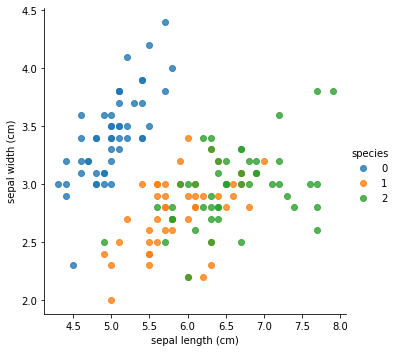

In [ ]:
sns.lmplot(x="sepal length (cm)",y="sepal width (cm)",fit_reg = False,hue="species",data = iris_df)

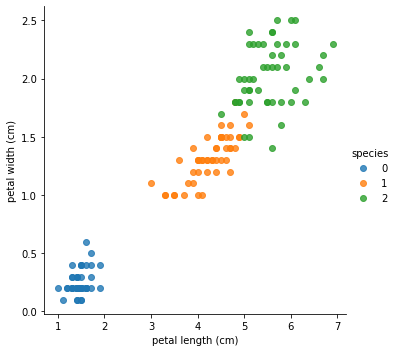

In [ ]:
sns.lmplot(x="petal length (cm)",y="petal width (cm)",fit_reg = False,hue="species",data = iris_df)

In [ ]:
x = iris_df.drop("sepal length (cm)", axis = 1)
y = iris_df["sepal length (cm)"]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
print(X_train)

     sepal width (cm)  petal length (cm)  petal width (cm)  species
15                4.4                1.5               0.4        0
47                3.2                1.4               0.2        0
133               2.8                5.1               1.5        2
40                3.5                1.3               0.3        0
137               3.1                5.5               1.8        2
..                ...                ...               ...      ...
63                2.9                4.7               1.4        1
90                2.6                4.4               1.2        1
92                2.6                4.0               1.2        1
95                3.0                4.2               1.2        1
141               3.1                5.1               2.3        2

[120 rows x 4 columns]


In [ ]:
print(X_test)

     sepal width (cm)  petal length (cm)  petal width (cm)  species
42                3.2                1.3               0.2        0
44                3.8                1.9               0.4        0
125               3.2                6.0               1.8        2
33                4.2                1.4               0.2        0
76                2.8                4.8               1.4        1
142               2.7                5.1               1.9        2
21                3.7                1.5               0.4        0
27                3.5                1.5               0.2        0
149               3.0                5.1               1.8        2
43                3.5                1.6               0.6        0
29                3.2                1.6               0.2        0
66                3.0                4.5               1.5        1
57                2.4                3.3               1.0        1
67                2.7                4.1        

In [ ]:
print(Y_train)

15     5.7
47     4.6
133    6.3
40     5.0
137    6.4
      ... 
63     6.1
90     5.5
92     5.8
95     5.7
141    6.9
Name: sepal length (cm), Length: 120, dtype: float64


In [ ]:
print(Y_test)

42     4.4
44     5.1
125    7.2
33     5.5
76     6.8
142    5.8
21     5.1
27     5.2
149    5.9
43     5.0
29     4.7
66     5.6
57     4.9
67     5.8
17     5.1
115    6.4
34     4.9
70     5.9
25     5.0
146    6.3
24     4.8
139    6.9
19     5.1
138    6.0
121    5.6
122    7.7
65     6.7
123    6.3
64     5.6
49     5.0
Name: sepal length (cm), dtype: float64


In [ ]:
linear_model = LinearRegression().fit(X_train,Y_train)
print(f"Linear Model --> Y=X1*{linear_model.coef_[0]} + X2*{linear_model.coef_[1]} + X3*{linear_model.coef_[2]} + {linear_model.intercept_}")
print("Score = ",linear_model.score(X_train,Y_train))


Linear Model --> Y=X1*0.6300985229784315 + X2*0.7227672390322439 + X3*-0.3415360220176578 + 1.8788501850605774
Score =  0.8637225531938527


In [ ]:
lasso_model = Lasso().fit(X_train,Y_train)
print(f"Lasso Model --> Y=X1*{lasso_model.coef_[0]} + X2*{lasso_model.coef_[1]} + X3*{lasso_model.coef_[2]} + {lasso_model.intercept_}")
print("Score = ",lasso_model.score(X_train,Y_train))

Lasso Model --> Y=X1*0.0 + X2*0.08420461693415675 + X3*0.0 + 5.561584100458727
Score =  0.2788780809411171


In [ ]:
ridge_model = Ridge().fit(X_train,Y_train)
print(f"Ridge Model --> Y=X1*{ridge_model.coef_[0]} + X2*{ridge_model.coef_[1]} + X3*{ridge_model.coef_[2]} + {ridge_model.intercept_}")
print("Score = ",ridge_model.score(X_train,Y_train))

Ridge Model --> Y=X1*0.5869629401079749 + X2*0.6630904506156081 + X3*-0.23772625148509477 + 2.0863119377310917
Score =  0.8625585890338292


In [ ]:
linear_prediction = linear_model.predict(X_test)

In [ ]:
print("R^2 = ",r2_score(Y_test,linear_prediction))
print("MAE = ",mean_absolute_error(Y_test,linear_prediction))
print("MSE = ",mean_squared_error(Y_test,linear_prediction))
print("RMSE = ",np.sqrt(mean_squared_error(Y_test,linear_prediction)))

R^2 =  0.8445987087906037
MAE =  0.25820846247479134
MSE =  0.09994202373878962
RMSE =  0.31613608420866735


In [ ]:
lasso_prediction = lasso_model.predict(X_test)

In [ ]:
print("R^2 = ",r2_score(Y_test,lasso_prediction))
print("MAE = ",mean_absolute_error(Y_test,lasso_prediction))
print("MSE = ",mean_squared_error(Y_test,lasso_prediction))
print("RMSE = ",np.sqrt(mean_squared_error(Y_test,lasso_prediction)))

R^2 =  0.24051838564932393
MAE =  0.590982902145494
MSE =  0.48843950355812765
RMSE =  0.698884470823417


In [ ]:
ridge_prediction = ridge_model.predict(X_test)

In [ ]:
print("R^2 = ",r2_score(Y_test,ridge_prediction))
print("MAE = ",mean_absolute_error(Y_test,ridge_prediction))
print("MSE = ",mean_squared_error(Y_test,ridge_prediction))
print("RMSE = ",np.sqrt(mean_squared_error(Y_test,ridge_prediction)))

R^2 =  0.8411714750288771
MAE =  0.26587604266383735
MSE =  0.10214615393170628
RMSE =  0.3196031194023398


In [ ]:
ridge_prediction_df = pd.DataFrame(ridge_model.predict(x),columns=["pred. sepal length (cm)"])
prediction_df = pd.DataFrame(concat([iris_df,ridge_prediction_df],axis=1))
print(prediction_df)

     sepal length (cm)  sepal width (cm)  ...  species  pred. sepal length (cm)
0                  5.1               3.5  ...        0                 5.021464
1                  4.9               3.0  ...        0                 4.727982
2                  4.7               3.2  ...        0                 4.779066
3                  4.6               3.1  ...        0                 4.852987
4                  5.0               3.6  ...        0                 5.080160
..                 ...               ...  ...      ...                      ...
145                6.7               3.0  ...        2                 6.284406
146                6.3               2.5  ...        2                 5.953397
147                6.5               3.0  ...        2                 6.355724
148                6.2               3.4  ...        2                 6.651810
149                5.9               3.0  ...        2                 6.336961

[150 rows x 6 columns]
